<h1 style='color: white;;font-family: Georgia;text-align:center'><strong>✨ Importing The Libraries And Reading Data ✨</strong></h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori 
from mlxtend.frequent_patterns import association_rules

In [ ]:
excel_file='G:\Download\Video\Groceries.xlsx'
sheet = ['HanhViMua','DanhMuc','Chiphi','data']

In [ ]:
data=pd.read_excel(excel_file,sheet_name='data')

In [4]:
data.head()

,Thời gian tạo đơn,Mã đơn hàng,Mã khách hàng,Tên khách hàng,Mã PKKH,Mô tả Phân Khúc Khách hàng,Mã nhóm hàng,Tên nhóm hàng,Mã mặt hàng,Tên mặt hàng,SL,Đơn giá,Thành tiền
0,2022-01-01 08:12:18,ORD0000001,CUZ00001,Nguyễn Chí Hiếu,A1,"Học sinh, sinh viên có sở thích ăn vặt",BAN,Bánh,BAN01,Bánh gấu thái lan nhân SCL,1,65000,65000
1,2022-01-01 08:12:18,ORD0000001,CUZ00001,Nguyễn Chí Hiếu,A1,"Học sinh, sinh viên có sở thích ăn vặt",BAN,Bánh,BAN02,Bánh gấu mix 3 vị,1,79000,79000
2,2022-01-01 08:12:18,ORD0000001,CUZ00001,Nguyễn Chí Hiếu,A1,"Học sinh, sinh viên có sở thích ăn vặt",BIM,Bim Bim,BIM01,Bắp rim bò lá chanh,2,54000,108000
3,2022-01-01 08:12:18,ORD0000001,CUZ00001,Nguyễn Chí Hiếu,A1,"Học sinh, sinh viên có sở thích ăn vặt",BIM,Bim Bim,BIM02,Cơm cháy lắc khô gà,2,58000,116000
4,2022-01-01 08:12:18,ORD0000001,CUZ00001,Nguyễn Chí Hiếu,A1,"Học sinh, sinh viên có sở thích ăn vặt",BIM,Bim Bim,BIM04,Me xí muội Thái Lan,2,79000,158000


In [5]:
data.tail()

,Thời gian tạo đơn,Mã đơn hàng,Mã khách hàng,Tên khách hàng,Mã PKKH,Mô tả Phân Khúc Khách hàng,Mã nhóm hàng,Tên nhóm hàng,Mã mặt hàng,Tên mặt hàng,SL,Đơn giá,Thành tiền
396044,2022-12-31 23:30:40,ORD0030265,CUZ10053,NaN,A1,"Học sinh, sinh viên có sở thích ăn vặt",KHO,Đồ Khô,KHO06,"Khô mix 3 vị (heo bơ tỏi, mực, gà)",1,109000,109000
396045,2022-12-31 23:30:40,ORD0030265,CUZ10053,NaN,A1,"Học sinh, sinh viên có sở thích ăn vặt",KHO,Đồ Khô,KHO07,Tóp mỡ rim mắm tỏi,5,99000,495000
396046,2022-12-31 23:30:40,ORD0030265,CUZ10053,NaN,A1,"Học sinh, sinh viên có sở thích ăn vặt",KHO,Đồ Khô,KHO08,Mực xé sợi hấp dừa,3,89000,267000
396047,2022-12-31 23:30:40,ORD0030265,CUZ10053,NaN,A1,"Học sinh, sinh viên có sở thích ăn vặt",KHO,Đồ Khô,KHO09,Da cá trứng muối,2,75000,150000
396048,2022-12-31 23:30:40,ORD0030265,CUZ10053,NaN,A1,"Học sinh, sinh viên có sở thích ăn vặt",NCO,Ngũ Cốc,NCO01,Thanh cơm gạo lứt chà bông,2,65000,130000


In [6]:
data.columns

Index(['Thời gian tạo đơn', 'Mã đơn hàng', 'Mã khách hàng', 'Tên khách hàng',
       'Mã PKKH', 'Mô tả Phân Khúc Khách hàng', 'Mã nhóm hàng',
       'Tên nhóm hàng', 'Mã mặt hàng', 'Tên mặt hàng', 'SL', 'Đơn giá',
       'Thành tiền'],
      dtype='object')

In [7]:
print('Data info:')
data.info()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396049 entries, 0 to 396048
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Thời gian tạo đơn           396049 non-null  object
 1   Mã đơn hàng                 396049 non-null  object
 2   Mã khách hàng               396049 non-null  object
 3   Tên khách hàng              156405 non-null  object
 4   Mã PKKH                     396049 non-null  object
 5   Mô tả Phân Khúc Khách hàng  396049 non-null  object
 6   Mã nhóm hàng                396049 non-null  object
 7   Tên nhóm hàng               396049 non-null  object
 8   Mã mặt hàng                 396049 non-null  object
 9   Tên mặt hàng                396049 non-null  object
 10  SL                          396049 non-null  int64 
 11  Đơn giá                     396049 non-null  int64 
 12  Thành tiền                  396049 non-null  int64 
dtypes: int64(3), objec

In [8]:
print('Shape of Dataset')
print(f'Rows: {data.shape[0]}')
print(f'Columns: {data.shape[1]}')

Shape of Dataset
Rows: 396049
Columns: 13


In [9]:
print('Data Type')
data.dtypes.value_counts()

Data Type


object    10
int64      3
Name: count, dtype: int64

In [10]:
print('Data Duplicated')
data.duplicated().sum()

Data Duplicated


0

In [11]:
print('Statistics of data')
data.describe()

Statistics of data


,SL,Đơn giá,Thành tiền
count,396049.000000,396049.000000,3.960490e+05
mean,2.352355,80159.477741,1.970438e+05
std,3.709168,19236.487202,3.768047e+05
min,1.000000,54000.000000,5.400000e+04
25%,1.000000,65000.000000,7.500000e+04
50%,1.000000,75000.000000,1.160000e+05
75%,2.000000,89000.000000,1.980000e+05
max,97.000000,119000.000000,1.154300e+07


<h3 style="color:white"><strong>🔘 Tạo các cột thời gian</strong></h3>

In [12]:
data['Thời gian tạo đơn'] = pd.to_datetime(data['Thời gian tạo đơn'])
# Extract day, month, year, and time into new columns
data['Thời gian'] = data['Thời gian tạo đơn'].dt.time

data['Ngày'] = data['Thời gian tạo đơn'].dt.day

data['Tháng'] = data['Thời gian tạo đơn'].dt.month

data['Quý'] = data['Thời gian tạo đơn'].dt.quarter

data['Năm'] = data['Thời gian tạo đơn'].dt.year

In [13]:
data.head()

,Thời gian tạo đơn,Mã đơn hàng,Mã khách hàng,Tên khách hàng,Mã PKKH,Mô tả Phân Khúc Khách hàng,Mã nhóm hàng,Tên nhóm hàng,Mã mặt hàng,Tên mặt hàng,SL,Đơn giá,Thành tiền,Thời gian,Ngày,Tháng,Quý,Năm
0,2022-01-01 08:12:18,ORD0000001,CUZ00001,Nguyễn Chí Hiếu,A1,"Học sinh, sinh viên có sở thích ăn vặt",BAN,Bánh,BAN01,Bánh gấu thái lan nhân SCL,1,65000,65000,08:12:18,1,1,1,2022
1,2022-01-01 08:12:18,ORD0000001,CUZ00001,Nguyễn Chí Hiếu,A1,"Học sinh, sinh viên có sở thích ăn vặt",BAN,Bánh,BAN02,Bánh gấu mix 3 vị,1,79000,79000,08:12:18,1,1,1,2022
2,2022-01-01 08:12:18,ORD0000001,CUZ00001,Nguyễn Chí Hiếu,A1,"Học sinh, sinh viên có sở thích ăn vặt",BIM,Bim Bim,BIM01,Bắp rim bò lá chanh,2,54000,108000,08:12:18,1,1,1,2022
3,2022-01-01 08:12:18,ORD0000001,CUZ00001,Nguyễn Chí Hiếu,A1,"Học sinh, sinh viên có sở thích ăn vặt",BIM,Bim Bim,BIM02,Cơm cháy lắc khô gà,2,58000,116000,08:12:18,1,1,1,2022
4,2022-01-01 08:12:18,ORD0000001,CUZ00001,Nguyễn Chí Hiếu,A1,"Học sinh, sinh viên có sở thích ăn vặt",BIM,Bim Bim,BIM04,Me xí muội Thái Lan,2,79000,158000,08:12:18,1,1,1,2022


<h1 style="color:#ffffff;font-family:Georgia;text-align:center;">
<strong>✨ Phân tích tổng quan ✨</strong>
</h1>

<h2 style="color:#ffffff;font-family:Georgia;text-align:center;">
<strong>---- Phân tích theo mặt hàng và nhóm hàng ----</strong>
<h2>

<h3 style="color:white"><strong>🔘 Số lượng sản phẩm</strong

In [14]:
unique_product=data['Mã mặt hàng'].nunique()
print('Số lượng sản phẩm:',unique_product)


Số lượng sản phẩm: 34


<h3 style="color:white"> <strong>🔘 Số lượng đơn hàng</strong>

In [15]:
unique_order=data['Mã đơn hàng'].nunique()
print('Số lượng đơn hàng:',unique_order)

Số lượng đơn hàng: 30265


<h3 style="color:white"><b>🔘 Số lượng đơn hàng theo tháng

In [16]:
orders_per_month = data.groupby('Tháng')['Mã đơn hàng'].nunique().sort_values(ascending=True)
data_orders_per_month = orders_per_month.reset_index(name='Số lượng đơn hàng')
data_orders_per_month

,Tháng,Số lượng đơn hàng
0,3,1512
1,1,1518
2,2,1605
3,4,1749
4,5,2291
5,7,2661
6,10,2703
7,8,2705
8,9,2888
9,6,2932


In [17]:
# Vẽ biểu đồ với Plotly
fig = px.bar(data_orders_per_month, x='Tháng', y='Số lượng đơn hàng',
             title='Số Lượng Đơn Hàng Theo Tháng',
             color='Số lượng đơn hàng',
             color_continuous_scale=px.colors.sequential.Viridis_r)
# Cập nhật bố cục
fig.update_layout(title='<b>Số Lượng Đơn Hàng Theo Từng Tháng<b>',
    xaxis_title="Tháng",
    yaxis_title="Số lượng đơn hàng",
    paper_bgcolor='lightgrey',
    plot_bgcolor='lightgrey'
)
# Hiển thị biểu đồ
fig.show()

<h3 style="color:white"><b>🔘 Số giao dịch của các mặt hàng được bán 

In [18]:
data_product_transaction=data.groupby("Tên mặt hàng")['Mã đơn hàng'].count().reset_index(name="Số giao dịch")
data_product_transaction_check=data_product_transaction.sort_values(by="Số giao dịch",ascending=True)
data_product_transaction_check

,Tên mặt hàng,Số giao dịch
32,Tàu hủ trân châu đường đen,4752
24,Sâm bổ lượng,4916
28,Trà sữa Socola,5056
30,Trà sữa thái xanh,5091
29,Trà sữa phúc long,5091
7,Chè dưỡng nhan,5326
31,Trà sữa ô long,5754
6,Bột củ sen hòa tan hạt dinh dưỡng collagen,7867
5,Bột củ sen hòa tan hạt chia hoa hạt dinh dưỡng,7889
4,Bột củ sen hòa tan dinh dưỡng không đường,10221


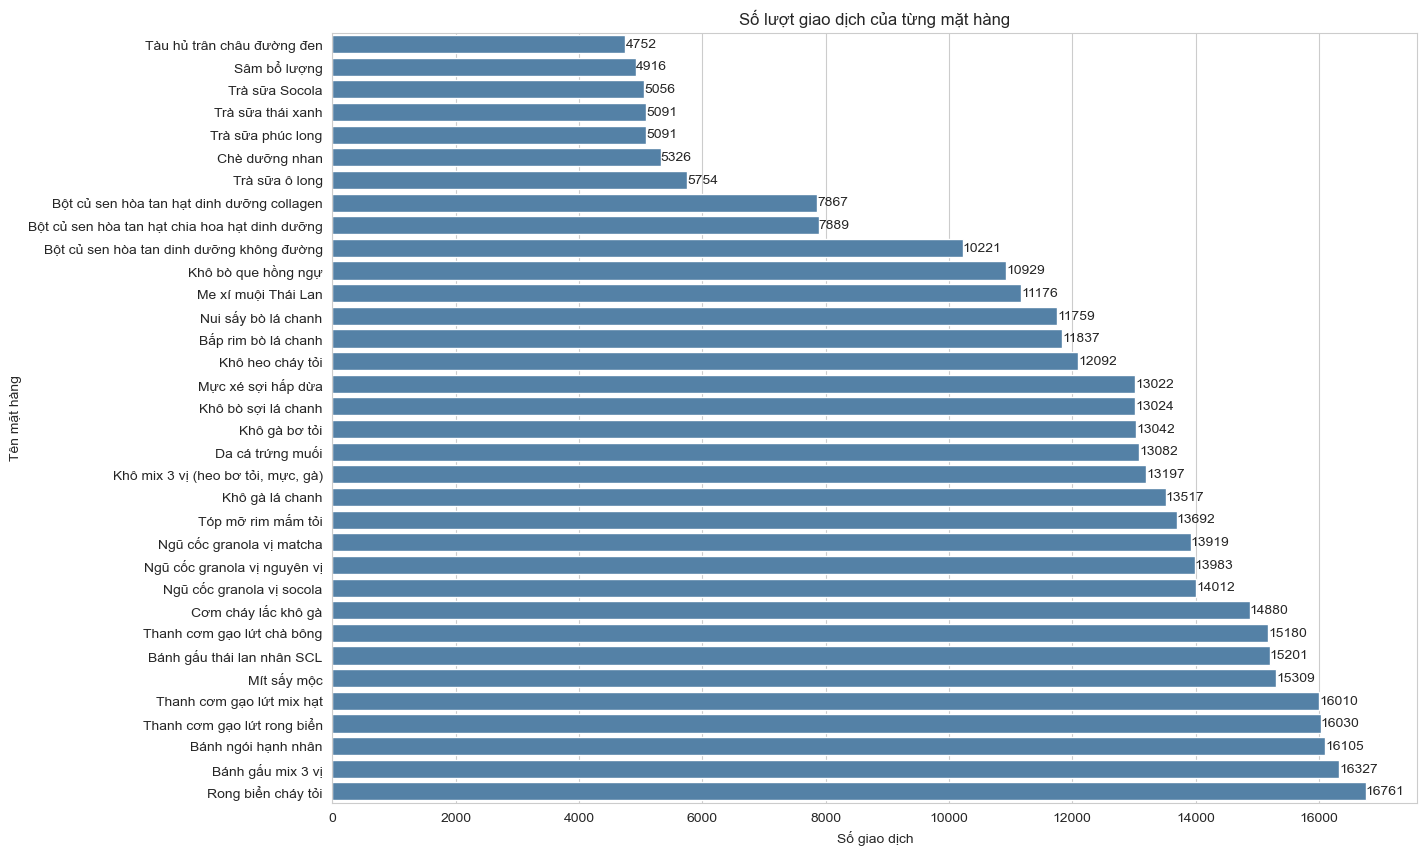

In [20]:
# Cài đặt phong cách hiển thị của biểu đồ
sns.set_style("whitegrid")

#Tạo khung và định kích thước biểu đồ
plt.figure(figsize=(14, 10))

# Vẽ biểu đồ thanh ngang
ax = sns.barplot(x='Số giao dịch', y='Tên mặt hàng', data=data_product_transaction_check, color='steelblue')  # Chọn màu 'steelblue'

# Thêm nhãn dữ liệu trên các thanh
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2,
             '{:1.0f}'.format(width), ha="left", va="center")  # Sử dụng ha="left" và va="center" để căn giữa

# Thêm tiêu đề và hiển thị biểu đồ
plt.title('Số lượt giao dịch của từng mặt hàng')
plt.show()

<h3 style="color:white"><b>🔘 Doanh thu theo từng nhóm hàng</b></h2>

In [22]:
data_ten_nhom_hang=data.groupby(["Tên nhóm hàng","Mã nhóm hàng"])['Thành tiền'].sum().sort_values(ascending=True).reset_index(name="Doanh thu")
data_ten_nhom_hang

,Tên nhóm hàng,Mã nhóm hàng,Doanh thu
0,Đồ uống,DUN,3285675000
1,Bột củ sen,BOT,3984825000
2,Bánh,BAN,6171875000
3,Bim Bim,BIM,9839956000
4,Đồ Khô,KHO,19763399000
5,Ngũ Cốc,NCO,34993269000


<h3 style="color:white"><b>--> Nhóm mặt hàng ngũ cốc chiếm doanh số tốt nhất và có cách biệt rõ ràng so với các mặt hàng còn lại</b></h3>


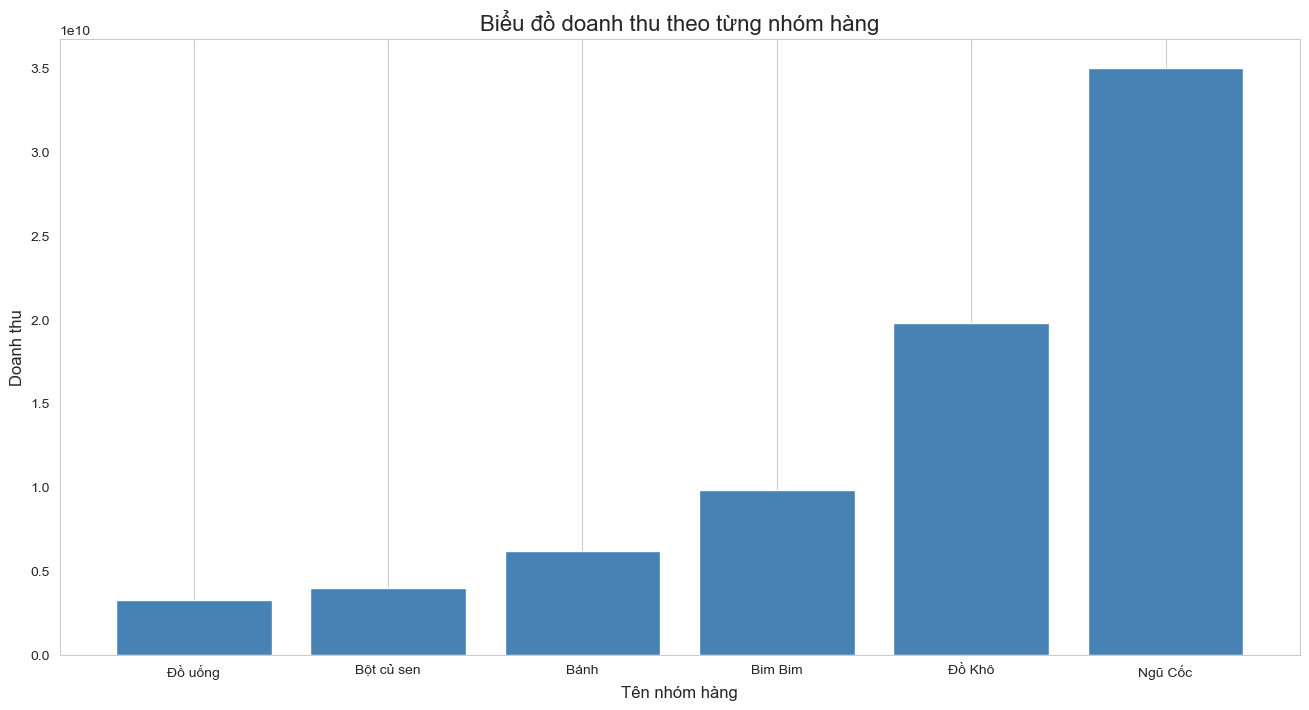

In [23]:
# Điều chỉnh kích thước biểu đồ
plt.figure(figsize=(16, 8))  

# Vẽ biểu đồ cột
plt.bar(data_ten_nhom_hang['Tên nhóm hàng'], data_ten_nhom_hang['Doanh thu'], color='steelblue')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Biểu đồ doanh thu theo từng nhóm hàng', fontsize=16)
plt.xlabel('Tên nhóm hàng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)

# Hiển thị biểu đồ
plt.grid(axis='y')  # Thêm lưới nền (tùy chọn)
plt.show()

<h3 style="color:white"><b>🔘 Doanh thu của mặt hàng theo từng nhóm hàng</b></h2>

In [24]:
data_product_of_group = data.groupby(['Tên nhóm hàng','Tên mặt hàng'])['Thành tiền'].sum().reset_index(name='Doanh thu')
data_product_of_group.sort_values(by=['Tên nhóm hàng', 'Doanh thu'], ascending=[True, False])

,Tên nhóm hàng,Tên mặt hàng,Doanh thu
5,Bim Bim,Rong biển cháy tỏi,2635968000
3,Bim Bim,Mít sấy mộc,2260944000
1,Bim Bim,Cơm cháy lắc khô gà,1586822000
2,Bim Bim,Me xí muội Thái Lan,1314876000
4,Bim Bim,Nui sấy bò lá chanh,1066484000
0,Bim Bim,Bắp rim bò lá chanh,974862000
8,Bánh,Bánh ngói hạnh nhân,2462031000
6,Bánh,Bánh gấu mix 3 vị,2178899000
7,Bánh,Bánh gấu thái lan nhân SCL,1530945000
9,Bột củ sen,Bột củ sen hòa tan dinh dưỡng không đường,1943175000


<h3 style="color:white"><strong>--> Trong nhóm mặt hàng ngũ cốc: <em>Ngũ cốc granola vị nguyên vị</em> chiếm doanh số tốt nhất</strong></h3>

In [25]:
color_discrete_sequence = px.colors.diverging.Portland 

fig = px.bar(data_product_of_group, x='Tên nhóm hàng', y='Doanh thu',
             title='Doanh thu',
             color='Tên mặt hàng', 
             color_discrete_sequence=color_discrete_sequence)

# Cập nhật bố cục
fig.update_layout(title='<b>Doanh thu của từng mặt hàng theo nhóm hàng</b>',
                  xaxis_title="Tên nhóm hàng",
                  yaxis_title="Doanh thu",
                  paper_bgcolor='lightgrey',
                  plot_bgcolor='lightgrey',
                  height=600,  # Tăng kích thước chiều cao
                  width=1200 # Tăng kích thước chiều rộng
)

# Hiển thị biểu đồ
fig.show()

<h3 style="color:white"><strong>🔘Tỷ lệ chuyển đổi của 6 nhóm hàng theo tháng</strong></h3>

<h4 style="color:white"><strong>+) Số lượng đơn hàng của 6 nhóm hàng theo tháng</strong></h4>

In [26]:
dt_6_order = data.groupby(["Tên nhóm hàng","Tháng"])['Mã đơn hàng'].nunique().reset_index(name="Số lượng đơn hàng")
dt_6_order

,Tên nhóm hàng,Tháng,Số lượng đơn hàng
0,Bim Bim,1,1412
1,Bim Bim,2,1300
2,Bim Bim,3,1104
3,Bim Bim,4,1399
4,Bim Bim,5,1887
...,...,...,...
67,Đồ uống,8,2322
68,Đồ uống,9,1599
69,Đồ uống,10,1442
70,Đồ uống,11,1666


<h4 style="color:white"><strong>+) Số lượng đơn hàng của 6 nhóm hàng</strong></h4>

In [27]:
dt_all_order= data.groupby('Tên nhóm hàng')['Mã đơn hàng'].nunique().reset_index(name="Số lượng đơn hàng")
dt_all_order

,Tên nhóm hàng,Số lượng đơn hàng
0,Bim Bim,25845
1,Bánh,25953
2,Bột củ sen,13765
3,Ngũ Cốc,24510
4,Đồ Khô,26534
5,Đồ uống,17605


<h4 style="color:white"><strong>+) Hợp 2 bảng lại</strong></h4>

In [28]:
conversion_rate = pd.merge(dt_6_order,dt_all_order, on=['Tên nhóm hàng'], suffixes=('_top_6', '_all'))
conversion_rate

,Tên nhóm hàng,Tháng,Số lượng đơn hàng_top_6,Số lượng đơn hàng_all
0,Bim Bim,1,1412,25845
1,Bim Bim,2,1300,25845
2,Bim Bim,3,1104,25845
3,Bim Bim,4,1399,25845
4,Bim Bim,5,1887,25845
...,...,...,...,...
67,Đồ uống,8,2322,17605
68,Đồ uống,9,1599,17605
69,Đồ uống,10,1442,17605
70,Đồ uống,11,1666,17605


<h3 style="color:white"><strong>+) Tính tỷ lệ chuyển đổi</strong></h3>

In [29]:
conversion_rate['tỷ lệ chuyển đổi (%)'] = (conversion_rate['Số lượng đơn hàng_top_6'] / conversion_rate['Số lượng đơn hàng_all']) * 100

# Xem kết quả
conversion_rate[['Tên nhóm hàng', 'Tháng', 'tỷ lệ chuyển đổi (%)']]

,Tên nhóm hàng,Tháng,tỷ lệ chuyển đổi (%)
0,Bim Bim,1,5.463339
1,Bim Bim,2,5.029986
2,Bim Bim,3,4.271619
3,Bim Bim,4,5.413039
4,Bim Bim,5,7.301219
...,...,...,...
67,Đồ uống,8,13.189435
68,Đồ uống,9,9.082647
69,Đồ uống,10,8.190855
70,Đồ uống,11,9.463221


<h3 style="color:white"><strong>+) Bảng hoàn thiện</strong></h3>

In [30]:
conversion_rate

,Tên nhóm hàng,Tháng,Số lượng đơn hàng_top_6,Số lượng đơn hàng_all,tỷ lệ chuyển đổi (%)
0,Bim Bim,1,1412,25845,5.463339
1,Bim Bim,2,1300,25845,5.029986
2,Bim Bim,3,1104,25845,4.271619
3,Bim Bim,4,1399,25845,5.413039
4,Bim Bim,5,1887,25845,7.301219
...,...,...,...,...,...
67,Đồ uống,8,2322,17605,13.189435
68,Đồ uống,9,1599,17605,9.082647
69,Đồ uống,10,1442,17605,8.190855
70,Đồ uống,11,1666,17605,9.463221


In [31]:
# Tạo biểu đồ đường sử dụng Plotly Express
fig = px.line(
    conversion_rate,
    x='Tháng',
    y='tỷ lệ chuyển đổi (%)',
    color='Tên nhóm hàng',
    title='Biểu Đồ Tỷ Lệ Chuyển Đổi Theo Từng Tháng',
    markers=True,
    color_discrete_sequence=px.colors.diverging.RdBu  
)

# Cập nhật bố cục
fig.update_layout(
    title='<b>Biểu Đồ Tỷ Lệ Chuyển Đổi Theo Từng Tháng của 6 nhóm hàng<b>',
    xaxis_title="Tháng",
    yaxis_title="Tỷ lệ chuyển đổi (%)",
    paper_bgcolor='lightgrey',
    plot_bgcolor='lightgrey'
)

# Cập nhật mẫu thông tin khi rê chuột (hover)
fig.update_traces(
    hovertemplate='Tháng: %{x} <br>Tên mặt hàng: %{data.name} <br>Tỷ lệ chuyển đổi: %{y:.2f}%'
)

# Cập nhật độ đậm của đường
fig.update_traces(
    line=dict(width=3)
)

# Hiển thị biểu đồ
fig.show()

<h4 style="color:white"><strong>* 
Nhận xét:</strong></h4>

<h4 style="color:white"><strong>--> Tỷ lệ chuyển đổi của hầu hết các nhóm hàng có xu hướng tăng dần từ tháng 1 đến tháng 12.
.</strong></h4>

<h4 style="color:white"><strong>---> Các nhóm hàng trong tháng 10,11,12 có tỷ lệ chuyển đổi vượt bật so với các tháng còn lại.</strong></h4>

<h3 style="color:white"><strong>--> Tổng quát lại, ta thấy được các nhóm hàng trong quý 4 có tỷ lệ chuyển đổi tốt nhất so với các quý còn lại. </strong></h4>

<h2 style="color:#ffffff;font-family:Georgia;text-align:center;">
<strong>---- Phân tích doanh thu theo thời gian ----</strong>
</h2>

<h3 style="color:white"><strong>🔘 Số lượng khách hàng</strong>

In [32]:
unique_cus=data['Mã khách hàng'].nunique()
print('Số lượng khách hàng:',unique_cus)

Số lượng khách hàng: 23056


<h3 style="color:white"><strong>
🔘 Tổng doanh thu</strong>

In [33]:
total_revenue=data['Thành tiền'].sum()
print(f'Tổng doanh thu: {total_revenue:,.0f} VNĐ')

Tổng doanh thu: 78,038,999,000 VNĐ


<h3 style="color:white"><strong>🔘 Trung bình doanh thu/khách hàng</strong>

In [34]:
average_revenue_per_cus=total_revenue/unique_cus
print(f'Trung bình doanh thu/khách hàng: {average_revenue_per_cus:,.0f} VNĐ')

Trung bình doanh thu/khách hàng: 3,384,759 VNĐ


<h3 style="color:white"><b>🔘 Doanh thu theo tháng </b></h3>

In [35]:

data_revenue_per_month = data.groupby("Tháng")['Thành tiền'].sum().reset_index(name='Doanh thu')
data_revenue_per_month.sort_values(by='Doanh thu', ascending=True)

,Tháng,Doanh thu
2,3,2094375000
3,4,2385088000
1,2,2414617000
0,1,3632227000
4,5,4226496000
8,9,4713469000
7,8,4818308000
6,7,6461747000
5,6,7096955000
10,11,7149526000


<h3 style="color:white"><b>--> Tháng 10 có doanh thu cao nhất và có sự cách biệt rõ ràng</b></h3>

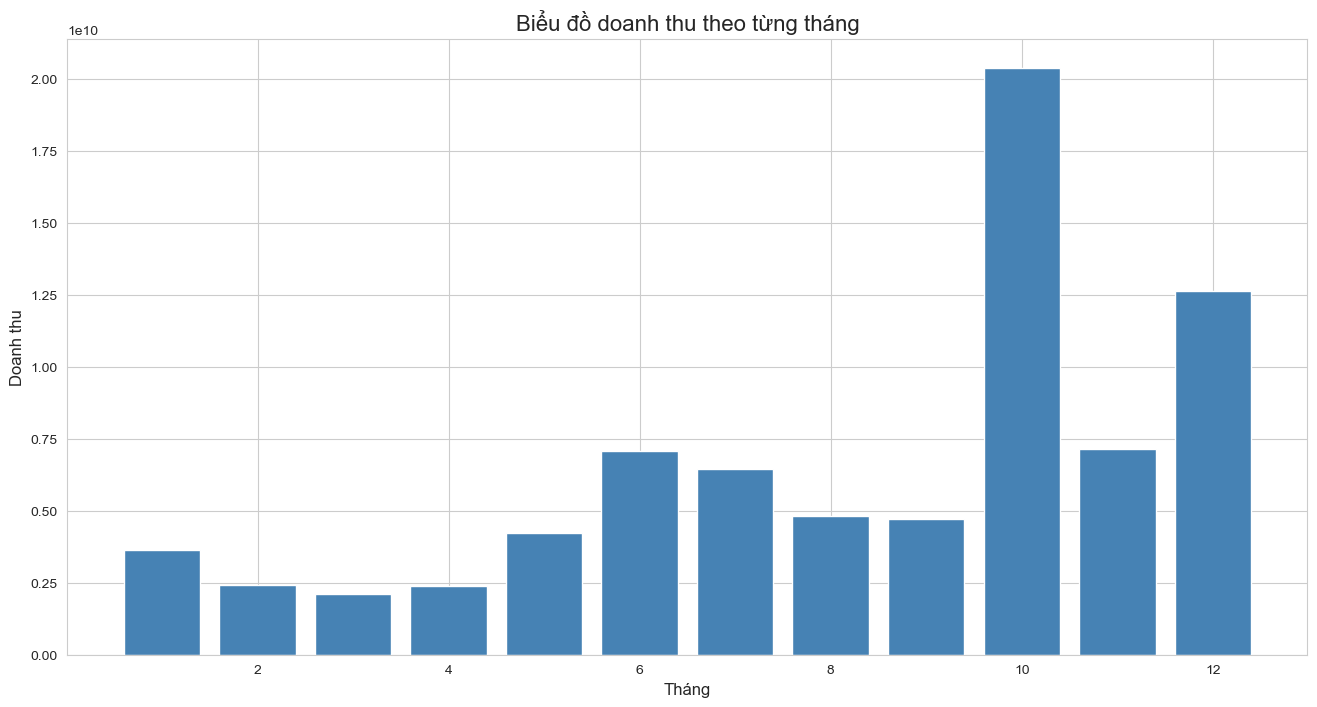

In [36]:
# Vẽ biểu đồ
plt.figure(figsize=(16, 8))
plt.bar(data_revenue_per_month['Tháng'], data_revenue_per_month['Doanh thu'], color='steelblue')

# Thêm tiêu đề và nhãn
plt.title('Biểu đồ doanh thu theo từng tháng', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)

# Hiển thị biểu đồ
plt.show()

<h3 style="color:white"><b>🔘 Doanh thu theo quý</b></h3>

In [37]:
revenue_per_quarter=data.groupby(['Quý','Năm'])['Thành tiền'].sum()
df_revenue_per_quarter=revenue_per_quarter.sort_values(ascending=True).reset_index(name="Doanh thu")
df_revenue_per_quarter

,Quý,Năm,Doanh thu
0,1,2022,8141219000
1,2,2022,13708539000
2,3,2022,15993524000
3,4,2022,40195717000


<h3 style="color:white"><strong>--> Quý 4 có doanh thu cao nhất và vượt trội so với các quý còn lại

In [38]:
fig=fig = px.line(df_revenue_per_quarter, x='Quý', y='Doanh thu', title='<b>Doanh Thu Biểu Diễn Theo Từng Tháng</b>')
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4],
        ticktext=['Q1', 'Q2', 'Q3', 'Q4']
    ),
    yaxis_title="Giá trị (VNĐ)",
    legend_title="Chỉ tiêu",
    paper_bgcolor='lightgrey',
    plot_bgcolor='lightgrey',
    
)

fig.update_traces(
    hovertemplate='Quý %{x}: %{y:.2f} VNĐ',
    line=dict(width=2)
)

fig.update_traces(selector=dict(name='Doanh thu'), line=dict(color='blue'))
fig.update_traces(selector=dict(name='Lợi nhuận'), line=dict(color='green', dash='dash'))

fig.show()

<h3 style="color:white"><strong>🔘 Tạo cột "Nhóm PKKH"</strong></h3>

In [39]:
data['Nhóm PKKH'] = data['Mã PKKH'].str[0]

In [40]:
data.head(2)

,Thời gian tạo đơn,Mã đơn hàng,Mã khách hàng,Tên khách hàng,Mã PKKH,Mô tả Phân Khúc Khách hàng,Mã nhóm hàng,Tên nhóm hàng,Mã mặt hàng,Tên mặt hàng,SL,Đơn giá,Thành tiền,Thời gian,Ngày,Tháng,Quý,Năm,Nhóm PKKH
0,2022-01-01 08:12:18,ORD0000001,CUZ00001,Nguyễn Chí Hiếu,A1,"Học sinh, sinh viên có sở thích ăn vặt",BAN,Bánh,BAN01,Bánh gấu thái lan nhân SCL,1,65000,65000,08:12:18,1,1,1,2022,A
1,2022-01-01 08:12:18,ORD0000001,CUZ00001,Nguyễn Chí Hiếu,A1,"Học sinh, sinh viên có sở thích ăn vặt",BAN,Bánh,BAN02,Bánh gấu mix 3 vị,1,79000,79000,08:12:18,1,1,1,2022,A


<h3 style="color:white"><strong>🔘 Doanh thu của từng nhóm PKKH</strong>

In [41]:

data_revenue_of_group_customer_segment = data.groupby('Nhóm PKKH')['Thành tiền'].sum().reset_index(name='Doanh thu')
data_revenue_of_group_customer_segment.sort_values(by='Doanh thu', ascending=True)

,Nhóm PKKH,Doanh thu
2,C,3889632000
0,A,30562294000
1,B,43587073000


<h3 style="color:white"><strong>--> Nhóm PKKH B có doanh thu cao nhất và cao gấp nhóm PKKH C gần 11 lần</strong>

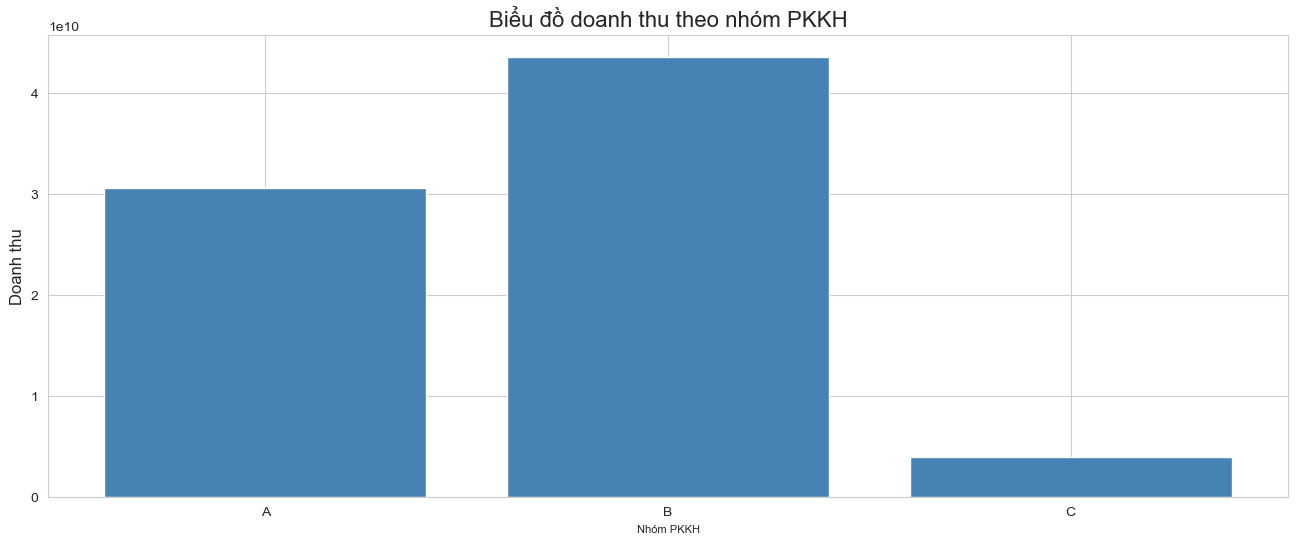

In [42]:
# Vẽ biểu đồ
plt.figure(figsize=(16, 6))
plt.bar(data_revenue_of_group_customer_segment['Nhóm PKKH'], data_revenue_of_group_customer_segment['Doanh thu'], color='steelblue')

# Thêm tiêu đề và nhãn
plt.title('Biểu đồ doanh thu theo nhóm PKKH', fontsize=16)
plt.xlabel('Nhóm PKKH', fontsize=8)
plt.ylabel('Doanh thu', fontsize=12)

# Hiển thị biểu đồ
plt.show()

<h3 style="color:white"><b>🔘 Doanh thu theo từng PKKH </b></h3>

In [43]:
data_revenue_of_customer_segment = data.groupby('Mã PKKH')['Thành tiền'].sum().reset_index(name='Doanh thu')
data_revenue_of_customer_segment.sort_values(by="Doanh thu", ascending=True)

,Mã PKKH,Doanh thu
8,C3,579745000
6,C1,947685000
7,C2,2362202000
1,A2,8480964000
0,A1,10076569000
3,B1,10377196000
2,A3,12004761000
5,B3,14428356000
4,B2,18781521000


<h3 style="color:white"><b>--> PKKH B2 có doanh thu cao nhất </b></h3>

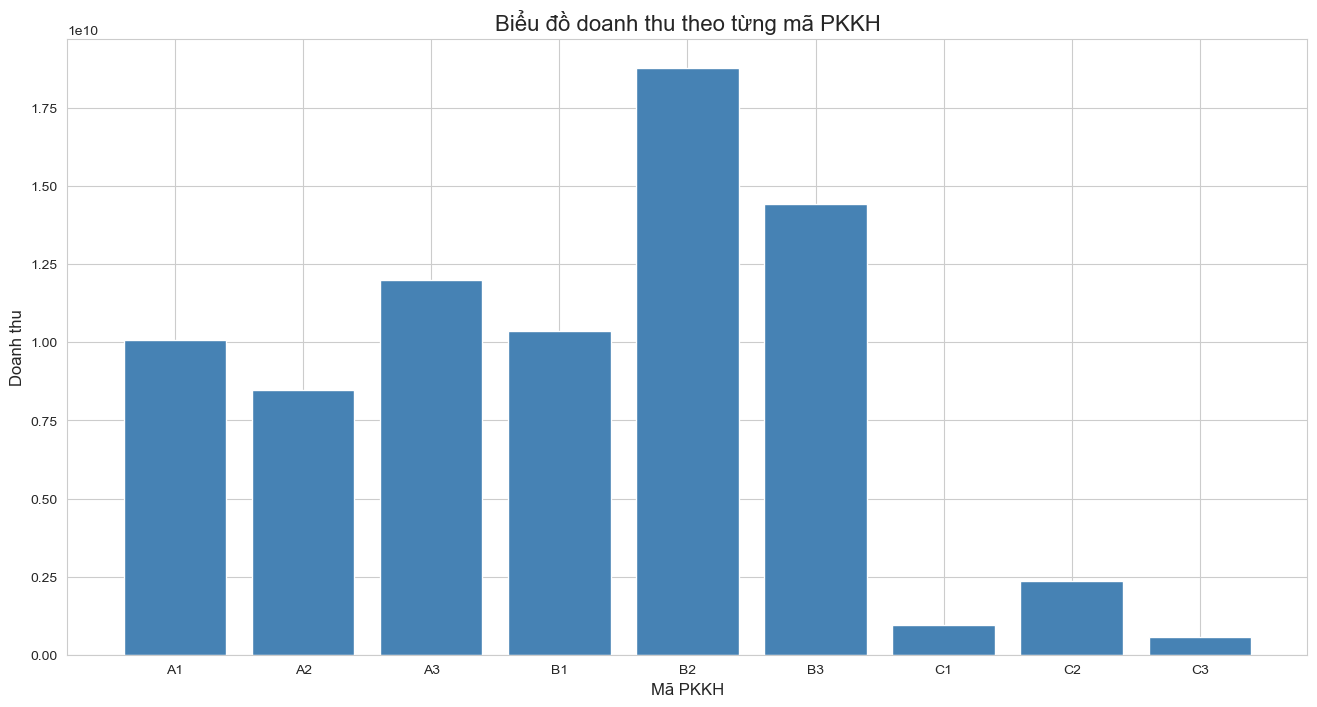

In [44]:
# Vẽ biểu đồ
plt.figure(figsize=(16, 8))
plt.bar(data_revenue_of_customer_segment['Mã PKKH'], data_revenue_of_customer_segment['Doanh thu'], color='steelblue')

# Thêm tiêu đề và nhãn
plt.title('Biểu đồ doanh thu theo từng mã PKKH', fontsize=16)
plt.xlabel('Mã PKKH', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)

# Hiển thị biểu đồ
plt.show()

<h3 style="color:white"><b>🔘 Doanh thu theo tháng của từng PKKH </b></h3>

In [45]:
data_revenue_of_segment_of_month = data.groupby(["Mã PKKH","Tháng"])["Thành tiền"].sum().reset_index(name="Doanh thu")
data_revenue_of_segment_of_month

,Mã PKKH,Tháng,Doanh thu
0,A1,1,182075000
1,A1,2,119789000
2,A1,3,148016000
3,A1,4,241847000
4,A1,5,440740000
...,...,...,...
103,C3,8,42906000
104,C3,9,36400000
105,C3,10,82964000
106,C3,11,45467000


In [46]:
# Tạo biểu đồ đường
fig = px.line(
    data_revenue_of_segment_of_month, 
    x='Tháng', 
    y='Doanh thu', 
    color='Mã PKKH', 
    title='Doanh Thu Biểu Diễn Theo Từng Tháng',
    markers=True, 
    color_discrete_sequence=px.colors.diverging.Portland   
)

# Cập nhật bố cục
fig.update_layout(
    title='<b>Doanh thu theo từng tháng của từng PKKH<b>',
    xaxis_title="Tháng",
    yaxis_title="Doanh Thu",
    paper_bgcolor='lightgrey',
    plot_bgcolor='lightgrey',
)

# Cập nhật độ đậm của đường
fig.update_traces(
    line=dict(width=2)
)

# Hiển thị biểu đồ
fig.show()

<h3 style="color:white"><b>🔘 Doanh thu theo quý của từng PKKH </b></h3>

In [47]:
data_revenue_of_segment_of_quarter = data.groupby(["Mã PKKH","Quý"])["Thành tiền"].sum().reset_index(name="Doanh thu")
data_revenue_of_segment_of_quarter.sort_values(by="Quý", ascending=True)

,Mã PKKH,Quý,Doanh thu
0,A1,1,449880000
32,C3,1,114555000
4,A2,1,1532391000
28,C2,1,409681000
24,C1,1,172274000
8,A3,1,2361691000
20,B3,1,1062339000
16,B2,1,1360131000
12,B1,1,678277000
33,C3,2,122304000


In [48]:
# Tạo biểu đồ đường
fig = px.line(
    data_revenue_of_segment_of_quarter, 
    x='Quý', 
    y='Doanh thu', 
    color='Mã PKKH', 
    title='Doanh Thu Biểu Diễn Theo Từng Quý',
    markers=True, 
    color_discrete_sequence=px.colors.diverging.Portland   
)

# Cập nhật bố cục
fig.update_layout(
    title='<b>Doanh thu theo từng Quý của từng PKKH<b>',
    xaxis_title="Quý",
    yaxis_title="Doanh Thu",
    paper_bgcolor='lightgrey',
    plot_bgcolor='lightgrey',
    height=600,  # Tăng kích thước chiều cao
    width=1100
)

# Cập nhật độ đậm của đường
fig.update_traces(
    line=dict(width=3)
)

# Hiển thị biểu đồ
fig.show()

<h3 style="color:white"><b>--> Từ phân tích tổng quan về số đơn hàng và doanh thu, ta thấy quý 4 có số đơn hàng và doanh thu vượt trội so với các quý còn lại trong năm</b></h3>

<h1 style="color:white"><strong><em>* Ý tưởng 1 : Phân tích theo Quý 4

<h3 style="color:white"><b>--> Nhóm sẽ thực hiện phân tích theo Quý 4</b></h3>

<p style="text-align:center;">------------------------------------------------------------------------------------</p>

<h1 style="color:#ffffff;font-family:Georgia;text-align:center;"><strong>✨ Phân tích giỏ hàng theo Quý 4 ✨

<h3 style="color:white"><b>🔘 Lọc ra những sản phẩm trong Quý 4</b></h3>

In [49]:
products_in_quarter = data[data["Quý"] ==4]
df_quarter=products_in_quarter

In [50]:
df_quarter.head()

,Thời gian tạo đơn,Mã đơn hàng,Mã khách hàng,Tên khách hàng,Mã PKKH,Mô tả Phân Khúc Khách hàng,Mã nhóm hàng,Tên nhóm hàng,Mã mặt hàng,Tên mặt hàng,SL,Đơn giá,Thành tiền,Thời gian,Ngày,Tháng,Quý,Năm,Nhóm PKKH
249410,2022-10-01 08:00:01,ORD0019862,CUZ16165,NaN,A2,"Nhân viên văn phòng, freelancer thu nhập trung...",BAN,Bánh,BAN01,Bánh gấu thái lan nhân SCL,1,65000,65000,08:00:01,1,10,4,2022,A
249411,2022-10-01 08:00:01,ORD0019862,CUZ16165,NaN,A2,"Nhân viên văn phòng, freelancer thu nhập trung...",BIM,Bim Bim,BIM02,Cơm cháy lắc khô gà,1,58000,58000,08:00:01,1,10,4,2022,A
249412,2022-10-01 08:00:01,ORD0019862,CUZ16165,NaN,A2,"Nhân viên văn phòng, freelancer thu nhập trung...",BIM,Bim Bim,BIM03,Nui sấy bò lá chanh,1,59000,59000,08:00:01,1,10,4,2022,A
249413,2022-10-01 08:00:01,ORD0019862,CUZ16165,NaN,A2,"Nhân viên văn phòng, freelancer thu nhập trung...",BIM,Bim Bim,BIM06,Rong biển cháy tỏi,1,64000,64000,08:00:01,1,10,4,2022,A
249414,2022-10-01 08:00:01,ORD0019862,CUZ16165,NaN,A2,"Nhân viên văn phòng, freelancer thu nhập trung...",BOT,Bột củ sen,BOT01,Bột củ sen hòa tan hạt chia hoa hạt dinh dưỡng,1,75000,75000,08:00:01,1,10,4,2022,A


<h3 style="color:white"><strong>🔘 Doanh thu những mặt hàng theo nhóm hàng

In [51]:
df_revenue_of_product=df_quarter.groupby(["Tên nhóm hàng","Tên mặt hàng"])['Thành tiền'].sum().reset_index(name="Doanh thu")
df_revenue_of_product.sort_values(by="Doanh thu",ascending=True)

,Tên nhóm hàng,Tên mặt hàng,Doanh thu
28,Đồ uống,Sâm bổ lượng,75520000
27,Đồ uống,Chè dưỡng nhan,86144000
30,Đồ uống,Trà sữa phúc long,89424000
29,Đồ uống,Trà sữa Socola,95016000
33,Đồ uống,Tàu hủ trân châu đường đen,95280000
31,Đồ uống,Trà sữa thái xanh,103016000
32,Đồ uống,Trà sữa ô long,125818000
0,Bim Bim,Bắp rim bò lá chanh,390960000
4,Bim Bim,Nui sấy bò lá chanh,431172000
2,Bim Bim,Me xí muội Thái Lan,525666000


In [52]:
color_discrete_sequence = px.colors.diverging.Portland 

fig = px.bar(df_revenue_of_product, x='Tên nhóm hàng', y='Doanh thu',
             title='Số khách hàng cao nhất với mỗi PKKH tương ứng với mỗi nhóm khách hàng RFM',
             color='Tên mặt hàng', # nếu mà muốn hiện cái thang màu theo Tổng Lợi Nhuận thì thay chỗ ni thành Tổng Lợi Nhuận
             color_discrete_sequence=color_discrete_sequence)

# Updating the layout
fig.update_layout(title='<b>Doanh thu của từng mặt hàng theo nhóm hàng</b>',
                  xaxis_title="Nhóm khách hàng",
                  yaxis_title="Số lượng khách hàng",
                  paper_bgcolor='lightgrey',
                  plot_bgcolor='lightgrey',
                  height=600,  # Tăng kích thước chiều cao
                  width=1200 # Tăng kích thước chiều rộng
)
# Cập nhật Hover Template
# Display the plot
fig.show()

<h1 style="color:white"><strong><em>* Ý tưởng 2: Mỗi nhóm hàng lấy ra một mặt hàng có doanh thu cao nhất trong Quý 4

<h3 style="color:white"><strong>🔘 Lọc ra những mặt hàng có doanh thu cao nhất trong mỗi mặt hàng

In [54]:
# Lọc ra các mặt hàng theo nhóm hàng
df_revenue_of_product_sorted = df_revenue_of_product.sort_values(by=['Tên nhóm hàng', 'Doanh thu'], ascending= False)
df_revenue_of_product_sorted
# Lấy ra các măt hàng có doanh thu cao nhất trong mỗi mặt hàng
df_top_items = df_revenue_of_product_sorted.groupby('Tên nhóm hàng').head(1)
# Gán biến mới 
df_top_6_items = df_top_items
df_top_6_items

,Tên nhóm hàng,Tên mặt hàng,Doanh thu
32,Đồ uống,Trà sữa ô long,125818000
24,Đồ Khô,"Khô mix 3 vị (heo bơ tỏi, mực, gà)",1129785000
13,Ngũ Cốc,Ngũ cốc granola vị nguyên vị,5299308000
9,Bột củ sen,Bột củ sen hòa tan dinh dưỡng không đường,1062750000
8,Bánh,Bánh ngói hạnh nhân,960201000
5,Bim Bim,Rong biển cháy tỏi,1067520000


<h3 style="color:white"><b>🔘 List các mặt hàng chính

In [55]:
# Chuyển những giá trị trong cột "Tên mặt hàng" thành list
list_of_items = df_top_6_items["Tên mặt hàng"].to_list()
# In ra danh sách
print(list_of_items)

['Trà sữa ô long', 'Khô mix 3 vị (heo bơ tỏi, mực, gà)', 'Ngũ cốc granola vị nguyên vị', 'Bột củ sen hòa tan dinh dưỡng không đường', 'Bánh ngói hạnh nhân', 'Rong biển cháy tỏi']


<h2 style="color:white"><b>* Drop các mặt hàng không nằm trong "list_of_items" trong dữ liệu chính <br>
--> Từ đó có DataFrame mới 

In [56]:
# Loại bỏ các sản phẩm mà giá trị trong cột "Tên mặt hàng" không có trong list_of_items
df = df_quarter[df_quarter["Tên mặt hàng"].isin(list_of_items)]
# In ra DataFrame sau khi đã lọc
df

,Thời gian tạo đơn,Mã đơn hàng,Mã khách hàng,Tên khách hàng,Mã PKKH,Mô tả Phân Khúc Khách hàng,Mã nhóm hàng,Tên nhóm hàng,Mã mặt hàng,Tên mặt hàng,SL,Đơn giá,Thành tiền,Thời gian,Ngày,Tháng,Quý,Năm,Nhóm PKKH
249413,2022-10-01 08:00:01,ORD0019862,CUZ16165,NaN,A2,"Nhân viên văn phòng, freelancer thu nhập trung...",BIM,Bim Bim,BIM06,Rong biển cháy tỏi,1,64000,64000,08:00:01,1,10,4,2022,A
249425,2022-10-01 08:07:47,ORD0019863,CUZ16166,NaN,C2,KOCs/Food reviewers,BAN,Bánh,BAN03,Bánh ngói hạnh nhân,1,99000,99000,08:07:47,1,10,4,2022,C
249428,2022-10-01 08:07:47,ORD0019863,CUZ16166,NaN,C2,KOCs/Food reviewers,BOT,Bột củ sen,BOT03,Bột củ sen hòa tan dinh dưỡng không đường,1,75000,75000,08:07:47,1,10,4,2022,C
249437,2022-10-01 08:07:47,ORD0019863,CUZ16166,NaN,C2,KOCs/Food reviewers,NCO,Ngũ Cốc,NCO06,Ngũ cốc granola vị nguyên vị,2,119000,238000,08:07:47,1,10,4,2022,C
249438,2022-10-01 08:22:15,ORD0019864,CUZ16167,NaN,B3,"Người làm trong lĩnh vực nghệ thuật, làm đẹp, ...",BOT,Bột củ sen,BOT03,Bột củ sen hòa tan dinh dưỡng không đường,1,75000,75000,08:22:15,1,10,4,2022,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,2022-12-31 23:23:46,ORD0030264,CUZ23056,NaN,A2,"Nhân viên văn phòng, freelancer thu nhập trung...",KHO,Đồ Khô,KHO06,"Khô mix 3 vị (heo bơ tỏi, mực, gà)",11,109000,1199000,23:23:46,31,12,4,2022,A
396029,2022-12-31 23:23:46,ORD0030264,CUZ23056,NaN,A2,"Nhân viên văn phòng, freelancer thu nhập trung...",NCO,Ngũ Cốc,NCO06,Ngũ cốc granola vị nguyên vị,1,119000,119000,23:23:46,31,12,4,2022,A
396032,2022-12-31 23:30:40,ORD0030265,CUZ10053,NaN,A1,"Học sinh, sinh viên có sở thích ăn vặt",BAN,Bánh,BAN03,Bánh ngói hạnh nhân,1,99000,99000,23:30:40,31,12,4,2022,A
396038,2022-12-31 23:30:40,ORD0030265,CUZ10053,NaN,A1,"Học sinh, sinh viên có sở thích ăn vặt",BIM,Bim Bim,BIM06,Rong biển cháy tỏi,2,64000,128000,23:30:40,31,12,4,2022,A


<h2 style='text-align: center; color: white'><strong>---- Thông tin chính trong dataframe mới ----
</strong>

In [57]:
df.head()

,Thời gian tạo đơn,Mã đơn hàng,Mã khách hàng,Tên khách hàng,Mã PKKH,Mô tả Phân Khúc Khách hàng,Mã nhóm hàng,Tên nhóm hàng,Mã mặt hàng,Tên mặt hàng,SL,Đơn giá,Thành tiền,Thời gian,Ngày,Tháng,Quý,Năm,Nhóm PKKH
249413,2022-10-01 08:00:01,ORD0019862,CUZ16165,NaN,A2,"Nhân viên văn phòng, freelancer thu nhập trung...",BIM,Bim Bim,BIM06,Rong biển cháy tỏi,1,64000,64000,08:00:01,1,10,4,2022,A
249425,2022-10-01 08:07:47,ORD0019863,CUZ16166,NaN,C2,KOCs/Food reviewers,BAN,Bánh,BAN03,Bánh ngói hạnh nhân,1,99000,99000,08:07:47,1,10,4,2022,C
249428,2022-10-01 08:07:47,ORD0019863,CUZ16166,NaN,C2,KOCs/Food reviewers,BOT,Bột củ sen,BOT03,Bột củ sen hòa tan dinh dưỡng không đường,1,75000,75000,08:07:47,1,10,4,2022,C
249437,2022-10-01 08:07:47,ORD0019863,CUZ16166,NaN,C2,KOCs/Food reviewers,NCO,Ngũ Cốc,NCO06,Ngũ cốc granola vị nguyên vị,2,119000,238000,08:07:47,1,10,4,2022,C
249438,2022-10-01 08:22:15,ORD0019864,CUZ16167,NaN,B3,"Người làm trong lĩnh vực nghệ thuật, làm đẹp, ...",BOT,Bột củ sen,BOT03,Bột củ sen hòa tan dinh dưỡng không đường,1,75000,75000,08:22:15,1,10,4,2022,B


In [58]:
df.tail()

,Thời gian tạo đơn,Mã đơn hàng,Mã khách hàng,Tên khách hàng,Mã PKKH,Mô tả Phân Khúc Khách hàng,Mã nhóm hàng,Tên nhóm hàng,Mã mặt hàng,Tên mặt hàng,SL,Đơn giá,Thành tiền,Thời gian,Ngày,Tháng,Quý,Năm,Nhóm PKKH
396024,2022-12-31 23:23:46,ORD0030264,CUZ23056,NaN,A2,"Nhân viên văn phòng, freelancer thu nhập trung...",KHO,Đồ Khô,KHO06,"Khô mix 3 vị (heo bơ tỏi, mực, gà)",11,109000,1199000,23:23:46,31,12,4,2022,A
396029,2022-12-31 23:23:46,ORD0030264,CUZ23056,NaN,A2,"Nhân viên văn phòng, freelancer thu nhập trung...",NCO,Ngũ Cốc,NCO06,Ngũ cốc granola vị nguyên vị,1,119000,119000,23:23:46,31,12,4,2022,A
396032,2022-12-31 23:30:40,ORD0030265,CUZ10053,NaN,A1,"Học sinh, sinh viên có sở thích ăn vặt",BAN,Bánh,BAN03,Bánh ngói hạnh nhân,1,99000,99000,23:30:40,31,12,4,2022,A
396038,2022-12-31 23:30:40,ORD0030265,CUZ10053,NaN,A1,"Học sinh, sinh viên có sở thích ăn vặt",BIM,Bim Bim,BIM06,Rong biển cháy tỏi,2,64000,128000,23:30:40,31,12,4,2022,A
396044,2022-12-31 23:30:40,ORD0030265,CUZ10053,NaN,A1,"Học sinh, sinh viên có sở thích ăn vặt",KHO,Đồ Khô,KHO06,"Khô mix 3 vị (heo bơ tỏi, mực, gà)",1,109000,109000,23:30:40,31,12,4,2022,A


In [59]:
print('Shape of Dataset')
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Shape of Dataset
Rows: 28517
Columns: 19


In [60]:
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 28517 entries, 249413 to 396044
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Thời gian tạo đơn           28517 non-null  datetime64[ns]
 1   Mã đơn hàng                 28517 non-null  object        
 2   Mã khách hàng               28517 non-null  object        
 3   Tên khách hàng              3351 non-null   object        
 4   Mã PKKH                     28517 non-null  object        
 5   Mô tả Phân Khúc Khách hàng  28517 non-null  object        
 6   Mã nhóm hàng                28517 non-null  object        
 7   Tên nhóm hàng               28517 non-null  object        
 8   Mã mặt hàng                 28517 non-null  object        
 9   Tên mặt hàng                28517 non-null  object        
 10  SL                          28517 non-null  int64         
 11  Đơn giá                     28517 non-null

<h2 style='text-align: center; color: white'><strong>---- Phân tích vài ý chính về dataframe mới để dẫn đến luật ----
</strong>

<h3 style="color:white"><strong>🔘 Phân tích mối quan hệ đồng xuất hiện giữa các mặt hàng 

In [61]:
from itertools import combinations
# Tạo nhóm theo 'Mã đơn hàng' và liệt kê các 'Tên nhóm hàng' liên quan
grouped = df.groupby('Mã đơn hàng')['Tên mặt hàng'].apply(list)

# Tạo một dictionary để đếm số lần xuất hiện của mỗi cặp sản phẩm
pair_counts = {}
for items in grouped:
    items = sorted(set(items))  # Loại bỏ trùng lặp và sắp xếp
    for pair in combinations(items, 2):
        if pair in pair_counts:
            pair_counts[pair] += 1
        else:
            pair_counts[pair] = 1

# Chuyển dictionary thành DataFrame
pairs_df = pd.DataFrame(list(pair_counts.items()), columns=['Item Pair', 'Số lượng'])
pairs_df = pairs_df.sort_values(by='Số lượng', ascending=False)

# Tách cặp nhóm hàng thành hai cột riêng biệt
pairs_df[['Group 1', 'Group 2']] = pd.DataFrame(pairs_df['Item Pair'].tolist(), index=pairs_df.index)

# Tạo pivot table và đảm bảo đối xứng
pivot_table = pairs_df.pivot_table(values='Số lượng', index='Group 1', columns='Group 2', aggfunc='sum', fill_value=0)
max_index = pivot_table.index.union(pivot_table.columns)
pivot_table = pivot_table.reindex(index=max_index, columns=max_index, fill_value=0)
pivot_table += pivot_table.T

In [62]:
pivot_table

,Bánh ngói hạnh nhân,Bột củ sen hòa tan dinh dưỡng không đường,"Khô mix 3 vị (heo bơ tỏi, mực, gà)",Ngũ cốc granola vị nguyên vị,Rong biển cháy tỏi,Trà sữa ô long
Bánh ngói hạnh nhân,0,2503,2925,3332,3773,821
Bột củ sen hòa tan dinh dưỡng không đường,2503,0,859,3970,2232,207
"Khô mix 3 vị (heo bơ tỏi, mực, gà)",2925,859,0,1719,3334,870
Ngũ cốc granola vị nguyên vị,3332,3970,1719,0,3080,462
Rong biển cháy tỏi,3773,2232,3334,3080,0,968
Trà sữa ô long,821,207,870,462,968,0


In [65]:
fig = go.Figure(data=go.Heatmap(
    z=pivot_table.to_numpy(),
    x=pivot_table.columns,
    y=pivot_table.index,
    colorscale='Blues',  # Sử dụng colorscale với độ tương phản cao hơn
    text=pivot_table.applymap(lambda x: '{:.0f}'.format(x) if x != 0 else ''),  # Định dạng số liệu để hiển thị
    texttemplate="%{text}",
    hoverinfo='text'  # Hiển thị text khi hover
))

# Cập nhật layout
fig.update_layout(
    title="Biểu đồ Heatmap về Cross-selling giữa các mặt hàng",
    xaxis_title="Product Group 2",
    yaxis_title="Product Group 1",
    xaxis={'side': 'bottom'},
    yaxis={'side': 'left'},
    font=dict(size=12),  # Điều chỉnh kích thước font cho dễ đọc
    autosize=False,
    width=1000,  # Điều chỉnh chiều rộng của biểu đồ
    height=600   # Điều chỉnh chiều cao của biểu đồ
)

# Hiển thị biểu đồ
fig.show()

C:\Users\DINH TAI\AppData\Local\Temp\ipykernel_2088\1502799851.py:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



<h3 style="color:white"><strong>🔘 Phân tích doanh thu của các mặt hàng bằng pareto

In [66]:
def calculate_pareto_dataframe(df, groupby_column):
    # Bước 1: Nhóm dữ liệu và tính tổng doanh thu
    revenue_sum = df.groupby(groupby_column)['Thành tiền'].sum().reset_index(name='Tổng Doanh Thu')
    
    # Bước 2: Sắp xếp dữ liệu giảm dần theo tổng doanh thu
    revenue_sum_sorted = revenue_sum.sort_values(by='Tổng Doanh Thu', ascending=False)
    
    # Bước 3: Tính tổng lũy kế của tổng doanh thu
    revenue_sum_sorted['Tổng Lũy Kế'] = revenue_sum_sorted['Tổng Doanh Thu'].cumsum()
    
    # Bước 4: Tính tổng lũy kế phần trăm
    total_revenue = revenue_sum_sorted['Tổng Doanh Thu'].sum()
    revenue_sum_sorted['Phần Trăm Lũy Kế'] = revenue_sum_sorted['Tổng Lũy Kế'] / total_revenue * 100
    
    return revenue_sum_sorted

In [67]:
def create_pareto_dataframes(df):
    pareto_dataframes = {}
    columns_to_groupby = ['Tên mặt hàng']
    
    for column in columns_to_groupby:
        pareto_dataframes[column] = calculate_pareto_dataframe(df, column)
    
    return pareto_dataframes

In [68]:
pareto_dfs = create_pareto_dataframes(df)

In [69]:
pareto_dfs['Tên mặt hàng']

,Tên mặt hàng,Tổng Doanh Thu,Tổng Lũy Kế,Phần Trăm Lũy Kế
3,Ngũ cốc granola vị nguyên vị,5299308000,5299308000,54.941401
2,"Khô mix 3 vị (heo bơ tỏi, mực, gà)",1129785000,6429093000,66.654623
4,Rong biển cháy tỏi,1067520000,7496613000,77.722303
1,Bột củ sen hòa tan dinh dưỡng không đường,1062750000,8559363000,88.740529
0,Bánh ngói hạnh nhân,960201000,9519564000,98.695562
5,Trà sữa ô long,125818000,9645382000,100.000000


In [70]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def draw_pareto_subplots(pareto_dfs, num_rows, num_cols):
    subplot_titles = tuple(pareto_dfs.keys())
    fig = make_subplots(
        rows=num_rows, cols=num_cols, 
        subplot_titles=subplot_titles,
        specs=[[{"secondary_y": True}] * num_cols] * num_rows
    )
    
    # Biến để theo dõi subplot hiện tại
    row = 1
    col = 1
    
    for column, df in pareto_dfs.items():
        # Truy cập đến DataFrame từ từ điển pareto_dfs
        df_pareto = pareto_dfs[column]
        
        # Thêm biểu đồ cột cho tổng doanh thu của từng mặt hàng
        fig.add_trace(
            go.Bar(x=df_pareto[column], y=df_pareto['Tổng Doanh Thu'], name='Doanh Thu', marker_color='blue'), 
            row=row, col=col, secondary_y=False
        )
        
        # Thêm biểu đồ đường cho tổng lũy kế phần trăm
        fig.add_trace(
            go.Scatter(x=df_pareto[column], y=df_pareto['Phần Trăm Lũy Kế'], name='Phần Trăm Lũy Kế', marker_color='red'),
            row=row, col=col, secondary_y=True
        )
        
    
    # Cập nhật layout cho tất cả subplots
    fig.update_layout(
        title_text="Biểu Đồ Pareto cho các mặt hàng",
        height=800,
        showlegend=False
    )
    
    # Định dạng lại cho từng trục y phụ (phần trăm lũy kế)
    for i in range(1, num_rows * num_cols + 1):
        fig.update_yaxes(title_text="Phần Trăm Lũy Kế (%)", secondary_y=True, tickformat=',.0f', row=i, col=1)
    
    # Hiển thị biểu đồ
    fig.show()

# Giả định pareto_dfs là từ điển chứa các DataFrame cho mỗi nhóm bạn muốn vẽ
# num_rows và num_cols là số hàng và cột mà bạn muốn trong subplot
draw_pareto_subplots(pareto_dfs, num_rows=1, num_cols=1)

<h3 style="color:white"><strong>--> Sau khi phân tích Data Frame mới, chúng ta có thể rút ra một số ý như:


<h3 style="color:white"><strong>- Sản phẩm ngũ cốc granola vị nguyên vị góp phần rất nhiều đến doanh thu


<h3 style="color:white"><strong>- Có những cặp sản phẩm được cùng xuất hiện cùng nhau trong một đơn hàng là rất nhiều

<h3 style="color:white"><strong>--> Để làm rõ hơn, chúng ta sẽ đi vào khai phá luật kết hợp của Data Frame mới này


<h1 style="color: white ;font-family:Georgia;text-align: center;font-size:50px;"><strong>✨ Data Preprocessing ✨</h1>

<h1 style="color:white"><strong>🔘 Lọc các giao dịch theo mã đơn hàng

In [71]:
top_6_quarter_item = df.groupby('Mã đơn hàng')['Tên mặt hàng'].unique().reset_index(name="Tên mặt hàng")
top_6_quarter_item

,Mã đơn hàng,Tên mặt hàng
0,ORD0019862,[Rong biển cháy tỏi]
1,ORD0019863,"[Bánh ngói hạnh nhân, Bột củ sen hòa tan dinh ..."
2,ORD0019864,"[Bột củ sen hòa tan dinh dưỡng không đường, Ng..."
3,ORD0019865,"[Bánh ngói hạnh nhân, Rong biển cháy tỏi, Ngũ ..."
4,ORD0019866,"[Bánh ngói hạnh nhân, Rong biển cháy tỏi]"
...,...,...
10143,ORD0030261,[Ngũ cốc granola vị nguyên vị]
10144,ORD0030262,"[Bột củ sen hòa tan dinh dưỡng không đường, Ng..."
10145,ORD0030263,"[Bánh ngói hạnh nhân, Rong biển cháy tỏi, Khô ..."
10146,ORD0030264,"[Bánh ngói hạnh nhân, Rong biển cháy tỏi, Khô ..."


<h1 style="color:white"><strong>🔘 Lọc các bộ giao dịch từ mã đơn hàng thành một danh sách giao dịch mới

In [72]:
groceries=[]
for rows in top_6_quarter_item['Tên mặt hàng']:
    groceries.append(rows)
groceries=pd.Series(groceries)
groceries

0                                     [Rong biển cháy tỏi]
1        [Bánh ngói hạnh nhân, Bột củ sen hòa tan dinh ...
2        [Bột củ sen hòa tan dinh dưỡng không đường, Ng...
3        [Bánh ngói hạnh nhân, Rong biển cháy tỏi, Ngũ ...
4                [Bánh ngói hạnh nhân, Rong biển cháy tỏi]
                               ...                        
10143                       [Ngũ cốc granola vị nguyên vị]
10144    [Bột củ sen hòa tan dinh dưỡng không đường, Ng...
10145    [Bánh ngói hạnh nhân, Rong biển cháy tỏi, Khô ...
10146    [Bánh ngói hạnh nhân, Rong biển cháy tỏi, Khô ...
10147    [Bánh ngói hạnh nhân, Rong biển cháy tỏi, Khô ...
Length: 10148, dtype: object

<h1 style="color:#ffffff;font-size:30px;font-family:Georgia;text-align: center">
<strong>---- Transform Data ----</strong></h1>

In [73]:
encoder=TransactionEncoder()

In [74]:
transactions= encoder.fit(groceries).transform(groceries)

In [75]:
itemsets=pd.DataFrame(transactions, columns = encoder.columns_)

In [77]:
itemsets.head(10)

,Bánh ngói hạnh nhân,Bột củ sen hòa tan dinh dưỡng không đường,"Khô mix 3 vị (heo bơ tỏi, mực, gà)",Ngũ cốc granola vị nguyên vị,Rong biển cháy tỏi,Trà sữa ô long
0,False,False,False,False,True,False
1,True,True,False,True,False,False
2,False,True,False,True,False,False
3,True,False,False,True,True,False
4,True,False,False,False,True,False
5,True,False,False,True,True,False
6,False,True,False,True,False,False
7,False,False,True,False,True,False
8,True,True,False,True,False,False
9,False,False,True,False,False,False


In [78]:
itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148 entries, 0 to 10147
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Bánh ngói hạnh nhân                        10148 non-null  bool 
 1   Bột củ sen hòa tan dinh dưỡng không đường  10148 non-null  bool 
 2   Khô mix 3 vị (heo bơ tỏi, mực, gà)         10148 non-null  bool 
 3   Ngũ cốc granola vị nguyên vị               10148 non-null  bool 
 4   Rong biển cháy tỏi                         10148 non-null  bool 
 5   Trà sữa ô long                             10148 non-null  bool 
dtypes: bool(6)
memory usage: 59.6 KB


<h1 style="color: white ;font-family:Georgia;text-align: center;font-size:50px;"><strong>✨ Thuật toán Apriori ✨</h1>

<h1 style="color:#ffffff;font-size:30px;font-family:Georgia;text-align: center">
<strong>---- Genrate Frequent Itemsets ----</strong></h1>

<h3 style="color:white"><strong>* Chọn min_support = 0.05

In [79]:
frequent_items=apriori(itemsets, use_colnames=True, min_support=0.05)

In [80]:
frequent_items

,support,itemsets
0,0.595684,(Bánh ngói hạnh nhân)
1,0.448069,(Bột củ sen hòa tan dinh dưỡng không đường)
2,0.449645,"(Khô mix 3 vị (heo bơ tỏi, mực, gà))"
3,0.581888,(Ngũ cốc granola vị nguyên vị)
4,0.596866,(Rong biển cháy tỏi)
5,0.137958,(Trà sữa ô long)
6,0.246650,"(Bánh ngói hạnh nhân, Bột củ sen hòa tan dinh ..."
7,0.288234,"(Bánh ngói hạnh nhân, Khô mix 3 vị (heo bơ tỏi..."
8,0.328341,"(Bánh ngói hạnh nhân, Ngũ cốc granola vị nguyê..."
9,0.371797,"(Bánh ngói hạnh nhân, Rong biển cháy tỏi)"


<h1 style="color:#ffffff;font-size:30px;font-family:Georgia;text-align: center">
<strong>---- Create Association Rules ----</strong></h1>

<h3 style="color:white"><strong>* Chọn min_threshold = 0.7

In [81]:
min_conf=0.7
rules = association_rules(frequent_items, metric='confidence', min_threshold=min_conf)

In [82]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bột củ sen hòa tan dinh dưỡng không đường),(Ngũ cốc granola vị nguyên vị),0.448069,0.581888,0.391210,0.873103,1.500466,0.130484,3.294896,0.604315
1,"(Khô mix 3 vị (heo bơ tỏi, mực, gà))",(Rong biển cháy tỏi),0.449645,0.596866,0.328538,0.730660,1.224160,0.060160,1.496744,0.332718
2,"(Bánh ngói hạnh nhân, Bột củ sen hòa tan dinh ...",(Ngũ cốc granola vị nguyên vị),0.246650,0.581888,0.214722,0.870555,1.496087,0.071200,3.230044,0.440153
3,"(Bánh ngói hạnh nhân, Khô mix 3 vị (heo bơ tỏi...",(Rong biển cháy tỏi),0.288234,0.596866,0.218861,0.759316,1.272171,0.046824,1.674951,0.300580
4,"(Bánh ngói hạnh nhân, Trà sữa ô long)",(Rong biển cháy tỏi),0.080903,0.596866,0.058041,0.717418,1.201974,0.009753,1.426606,0.182826
5,"(Bột củ sen hòa tan dinh dưỡng không đường, Kh...",(Ngũ cốc granola vị nguyên vị),0.084647,0.581888,0.067205,0.793946,1.364432,0.017950,2.029142,0.291794
6,"(Bột củ sen hòa tan dinh dưỡng không đường, Ro...",(Ngũ cốc granola vị nguyên vị),0.219945,0.581888,0.196492,0.893369,1.535294,0.068509,3.921117,0.446967
7,"(Trà sữa ô long, Khô mix 3 vị (heo bơ tỏi, mực...",(Rong biển cháy tỏi),0.085731,0.596866,0.066023,0.770115,1.290264,0.014853,1.753631,0.246060
8,"(Bánh ngói hạnh nhân, Bột củ sen hòa tan dinh ...",(Ngũ cốc granola vị nguyên vị),0.129188,0.581888,0.115097,0.890923,1.531090,0.039924,3.833180,0.398330
9,"(Bánh ngói hạnh nhân, Ngũ cốc granola vị nguyê...",(Rong biển cháy tỏi),0.110367,0.596866,0.077651,0.703571,1.178775,0.011777,1.359969,0.170477


<h1 style="color:#ffffff;font-size:30px;font-family:Georgia;text-align: center">
<strong>---- Đánh giá các luật qua các độ đo chính ----</strong></h1>

In [83]:
print("Association Rules:")
rules=rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules

Association Rules:


,antecedents,consequents,support,confidence,lift
0,(Bột củ sen hòa tan dinh dưỡng không đường),(Ngũ cốc granola vị nguyên vị),0.391210,0.873103,1.500466
1,"(Khô mix 3 vị (heo bơ tỏi, mực, gà))",(Rong biển cháy tỏi),0.328538,0.730660,1.224160
2,"(Bánh ngói hạnh nhân, Bột củ sen hòa tan dinh ...",(Ngũ cốc granola vị nguyên vị),0.214722,0.870555,1.496087
3,"(Bánh ngói hạnh nhân, Khô mix 3 vị (heo bơ tỏi...",(Rong biển cháy tỏi),0.218861,0.759316,1.272171
4,"(Bánh ngói hạnh nhân, Trà sữa ô long)",(Rong biển cháy tỏi),0.058041,0.717418,1.201974
5,"(Bột củ sen hòa tan dinh dưỡng không đường, Kh...",(Ngũ cốc granola vị nguyên vị),0.067205,0.793946,1.364432
6,"(Bột củ sen hòa tan dinh dưỡng không đường, Ro...",(Ngũ cốc granola vị nguyên vị),0.196492,0.893369,1.535294
7,"(Trà sữa ô long, Khô mix 3 vị (heo bơ tỏi, mực...",(Rong biển cháy tỏi),0.066023,0.770115,1.290264
8,"(Bánh ngói hạnh nhân, Bột củ sen hòa tan dinh ...",(Ngũ cốc granola vị nguyên vị),0.115097,0.890923,1.531090
9,"(Bánh ngói hạnh nhân, Ngũ cốc granola vị nguyê...",(Rong biển cháy tỏi),0.077651,0.703571,1.178775


<h3 style="color:white"><strong>Lọc theo độ đo lift cao nhất

In [84]:
rules_lift = rules.sort_values(by="lift", ascending=False)
rules_lift

,antecedents,consequents,support,confidence,lift
6,"(Bột củ sen hòa tan dinh dưỡng không đường, Ro...",(Ngũ cốc granola vị nguyên vị),0.196492,0.893369,1.535294
8,"(Bánh ngói hạnh nhân, Bột củ sen hòa tan dinh ...",(Ngũ cốc granola vị nguyên vị),0.115097,0.890923,1.531090
0,(Bột củ sen hòa tan dinh dưỡng không đường),(Ngũ cốc granola vị nguyên vị),0.391210,0.873103,1.500466
2,"(Bánh ngói hạnh nhân, Bột củ sen hòa tan dinh ...",(Ngũ cốc granola vị nguyên vị),0.214722,0.870555,1.496087
5,"(Bột củ sen hòa tan dinh dưỡng không đường, Kh...",(Ngũ cốc granola vị nguyên vị),0.067205,0.793946,1.364432
7,"(Trà sữa ô long, Khô mix 3 vị (heo bơ tỏi, mực...",(Rong biển cháy tỏi),0.066023,0.770115,1.290264
3,"(Bánh ngói hạnh nhân, Khô mix 3 vị (heo bơ tỏi...",(Rong biển cháy tỏi),0.218861,0.759316,1.272171
1,"(Khô mix 3 vị (heo bơ tỏi, mực, gà))",(Rong biển cháy tỏi),0.328538,0.730660,1.224160
4,"(Bánh ngói hạnh nhân, Trà sữa ô long)",(Rong biển cháy tỏi),0.058041,0.717418,1.201974
9,"(Bánh ngói hạnh nhân, Ngũ cốc granola vị nguyê...",(Rong biển cháy tỏi),0.077651,0.703571,1.178775


<h1 style="color:white; text-align:center"><strong>---- Rút ra các kết luận từ luật ----

<h3 style="color:white"><strong>- Sản phẩm Ngũ cốc granola vị nguyên vị thường được mua kèm khi khách hàng mua sản phẩm Bột củ sen hòa tan dinh dưỡng không đường và rong biển cháy tỏi

<h3 style="color:white"><strong>- Rong biển cháy tỏi thường được mua kèm khi khách hàng mua sản phẩm Khô mix 3 vị (heo bơ tỏi, mực, gà)